# Machine Learning Project << House price prediction >>

-----------------------------------------------------------------------------------------------------------------------------------------------------------
## Partie 1 : l'analyse et le prétraitement des données
-----------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('house_prices_dataset.csv')
df_clean = df.copy()
df_clean.head()

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903


In [3]:
df_clean.shape

(10000, 5)

In [4]:
df_clean.describe()

,square_feet,num_rooms,age,distance_to_city(km),price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1999.147496,4.49510,49.516900,15.362148,263011.571609
std,501.021194,1.71116,28.992336,8.325101,98336.945117
min,500.000000,2.00000,0.000000,1.000161,-95613.138249
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3963.118853,7.00000,99.000000,29.993892,660168.255648


In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   square_feet           10000 non-null  float64
 1   num_rooms             10000 non-null  int64  
 2   age                   10000 non-null  int64  
 3   distance_to_city(km)  10000 non-null  float64
 4   price                 10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


Les valeurs manquantes

In [6]:
df_clean.isnull().sum()

square_feet             0
num_rooms               0
age                     0
distance_to_city(km)    0
price                   0
dtype: int64

Les dupliquées

In [7]:
df_clean.duplicated().sum()

np.int64(0)

Valeurs abbérantes

In [8]:
df_clean.describe()

,square_feet,num_rooms,age,distance_to_city(km),price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1999.147496,4.49510,49.516900,15.362148,263011.571609
std,501.021194,1.71116,28.992336,8.325101,98336.945117
min,500.000000,2.00000,0.000000,1.000161,-95613.138249
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3963.118853,7.00000,99.000000,29.993892,660168.255648


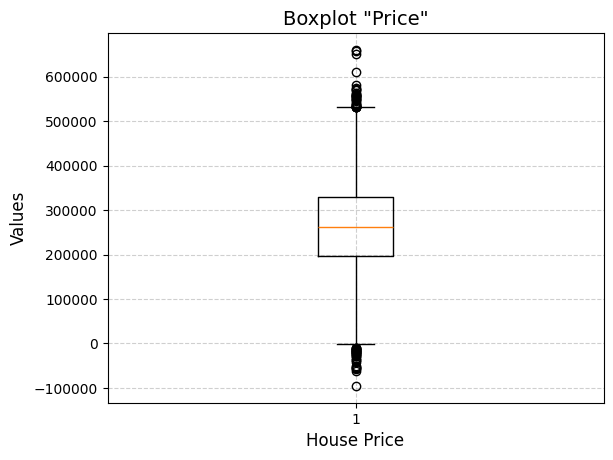

In [9]:
plt.boxplot(df_clean['price'])
plt.xlabel('House Price',fontsize=12)
plt.ylabel('Values',fontsize=12)
plt.title('Boxplot "Price"',fontsize=14)
plt.grid(True, linestyle='--',alpha=0.6)
plt.show()

In [10]:
#df_clean['price'].median()

In [11]:
df_clean.loc[(df_clean['price']<0), 'price'] *= -1

In [12]:
df_clean.describe()

,square_feet,num_rooms,age,distance_to_city(km),price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1999.147496,4.49510,49.516900,15.362148,263202.425876
std,501.021194,1.71116,28.992336,8.325101,97824.917808
min,500.000000,2.00000,0.000000,1.000161,174.815934
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3963.118853,7.00000,99.000000,29.993892,660168.255648


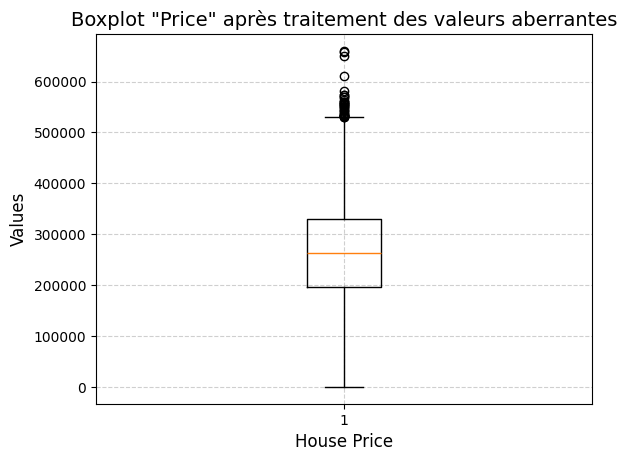

In [13]:
plt.boxplot(df_clean['price'])
plt.xlabel('House Price',fontsize=12)
plt.ylabel('Values',fontsize=12)
plt.title('Boxplot "Price" après traitement des valeurs aberrantes',fontsize=14)
plt.grid(True, linestyle='--',alpha=0.6)
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------
## Partie 2 : Machine Learning Model 
-----------------------------------------------------------------------------------------------------------------------------------------------------------

In [14]:
df_clean.head()

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903


### Matrice de corrélation

Text(0.5, 1.0, 'Correlation Matrix')

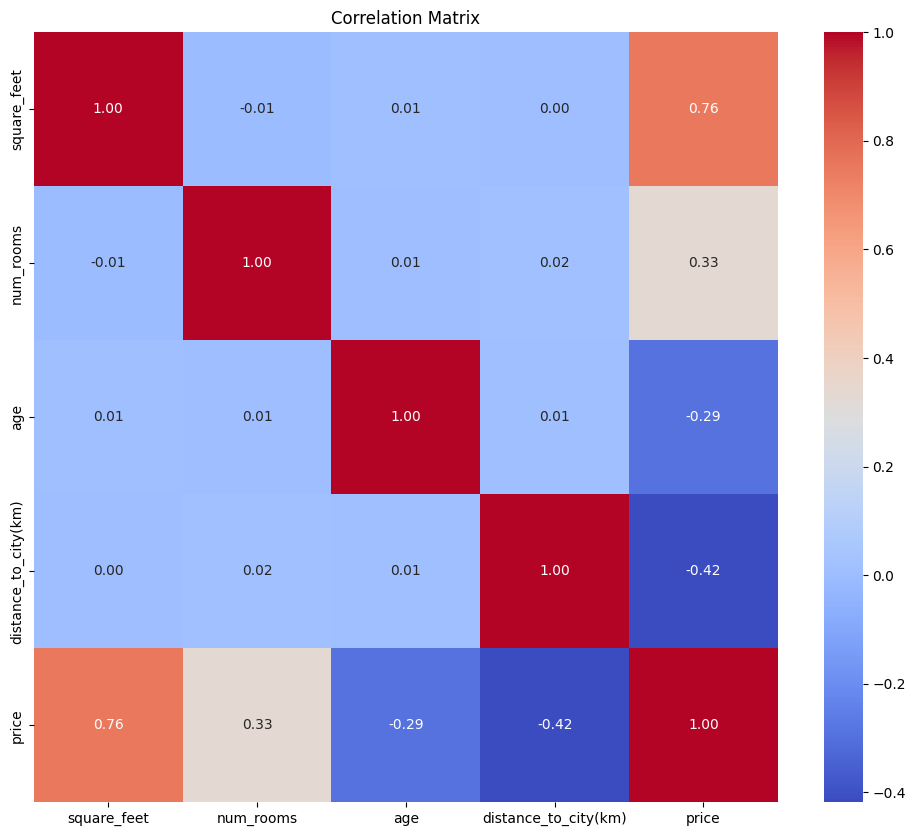

In [15]:
import seaborn as sns
plt.figure(figsize=(12,10))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')

In [16]:
correlation_price = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_price)

price                   1.000000
square_feet             0.755826
num_rooms               0.334739
age                    -0.291080
distance_to_city(km)   -0.418150
Name: price, dtype: float64


### La normalisation 

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = df_clean.drop(columns='price')  # price est la variable cible 
df_scaled = scaler.fit_transform(cols)
df_scaled = pd.DataFrame(df_scaled, columns=cols.columns)
df_scaled

,square_feet,num_rooms,age,distance_to_city(km)
0,0.497428,-0.873778,1.465395,0.917251
1,-0.136288,-1.458207,-0.949157,-0.165519
2,0.648102,0.879506,-0.569727,0.737421
3,1.521703,-0.873778,0.465081,-0.602847
4,-0.231986,1.463934,0.154638,1.216028
...,...,...,...,...
9995,1.300217,1.463934,-1.397574,0.332011
9996,-1.992670,-1.458207,0.120145,1.095242
9997,-0.702213,0.295078,1.051472,-1.582382
9998,0.496481,0.879506,0.810017,1.509831


In [18]:
x = df_scaled
y = df_clean['price']

### La division des données

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### L'entrainement du modèle

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Text(0.5, 1.0, 'Real vs Predicted house prices')

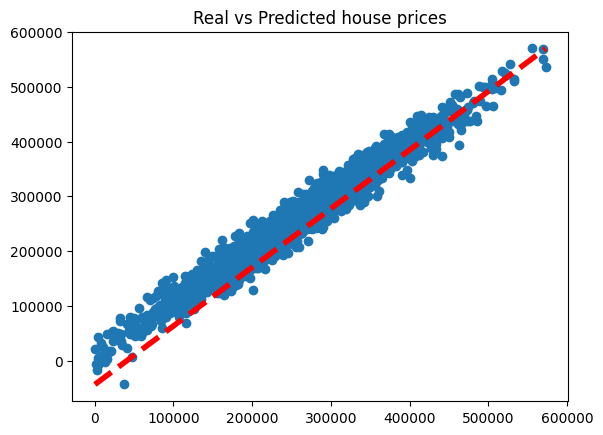

In [21]:
y_pred = model.predict(x_test)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'r--', lw=4)
plt.title('Real vs Predicted house prices')

In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score : ",r2)

R2 Score :  0.9597351878443845


### Sauvegarde du modèle

In [23]:
import joblib
#save model
joblib.dump(model, 'House_Price_Prediction_Model.pkl')
#save scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Exemple d'application

In [24]:
parameters = np.array([2200, 3, 92, 22]).reshape(1, -1)
parameters_scaled = scaler.transform(parameters)
model.predict(parameters_scaled)

c:\Users\ngadi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ngadi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([187629.79281948])

In [25]:
square_feet = float(input("Enter the square feet of the house : "))
num_rooms = int(input("Enter the number of the rooms : "))
age = int(input("Enter the age of the house : "))
distance_to_city = float(input("Enter the distance to city : "))

parameters = np.array([square_feet, num_rooms, age, distance_to_city]).reshape(1, -1)
parameters_scaled = scaler.transform(parameters)
price = model.predict(parameters_scaled)

print("For these values : ", parameters)
print("Predicted price of the house is : ", price)

For these values :  [[1000.    2.  123.   12.]]
Predicted price of the house is :  [7969.23188476]


c:\Users\ngadi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ngadi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
